In [2]:
from taxi_pakage import *
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
%matplotlib inline

In [4]:
taxi = pd.read_csv('edited_taxi.csv')
taxi = taxi[taxi['trip_duration']<86400].reset_index(drop=True) # 24시간 이상 탑승 제거 -4
taxi.tail()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dist,pick_date,pick_time,drop_time,holiday,holiday_Fri,weekday,trip_duration
1458635,2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,0,1.224311,98,48663,49441,1,1,5,778
1458636,1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,0,6.046037,9,27314,27969,1,1,7,655
1458637,2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,0,7.819693,112,25060,25824,1,1,5,764
1458638,2714485,1,1,-73.982079,40.749062,-73.974632,40.757107,0,1.091878,4,57385,57758,1,1,2,373
1458639,1209952,1,1,-73.979538,40.781750,-73.972809,40.790585,0,1.133330,95,53064,53262,1,1,2,198


In [5]:
taxi['hour'] = taxi['pick_time'].apply(lambda x: round(x/3600))

In [6]:
taxi.drop('drop_time', axis=1, inplace=True)
taxi.drop(['holiday_Fri', 'store_and_fwd_flag', 'id'], axis=1, inplace=True)

In [7]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(taxi.values, i) for i in range(taxi.shape[1])]
vif["features"] = taxi.columns
vif

,VIF Factor,features
0,1.142856e+01,vendor_id
1,2.841070e+00,passenger_count
2,2.931303e+06,pickup_longitude
3,1.682113e+06,pickup_latitude
4,2.735736e+06,dropoff_longitude
5,1.477365e+06,dropoff_latitude
6,1.750635e+00,dist
7,4.189619e+00,pick_date
8,2.906635e+03,pick_time
9,4.562908e+01,holiday


In [132]:
feature_n, features = get_features(taxi, 1,-3, scale=False)
feature_n, features

(8,
 'passenger_count + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + dist + pick_date + pick_time')

In [136]:
test, Dropped = erase_outlier_np(result, taxi, feature_n+7, category=True, dropped=True)

In [137]:
len(Dropped)

2631

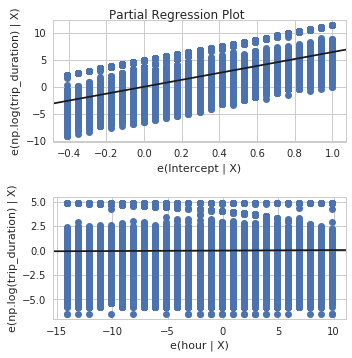

In [8]:
result = sm.OLS.from_formula("np.log(trip_duration) ~ hour", data=taxi).fit()
fig = plt.figure(figsize=(5, 5))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.show()

### np.log(trip_duration) ~ np.log(pick_time//dist+1) 
R - 0.267 / cond.no 73.1


In [226]:
model =  sm.OLS.from_formula("np.log(trip_duration) ~ np.log(pick_time//dist +1)", data=taxi)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(trip_duration)   R-squared:                       0.267
Model:                               OLS   Adj. R-squared:                  0.267
Method:                    Least Squares   F-statistic:                 5.286e+05
Date:                   Sat, 10 Mar 2018   Prob (F-statistic):               0.00
Time:                           17:42:38   Log-Likelihood:            -1.4895e+06
No. Observations:                1452743   AIC:                         2.979e+06
Df Residuals:                    1452741   BIC:                         2.979e+06
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         9.4172      0.004   2301.039      0.000       9.409       9.425
np.log(pick_time // dist + 1)    -0.3006      0.000   -727.028      0.000      -0.301      -0.300
==============================================================================
Omnibus:                   150249.662   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1287904.002
Skew:                          -0.068   Prob(JB):                         0.00
Kurtosis:                       7.611   Cond. No.                         73.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

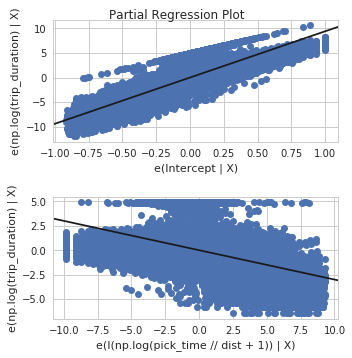

In [162]:
fig = plt.figure(figsize=(5, 5))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.show()

In [246]:
model =  sm.OLS.from_formula("trip_duration ~ pick_time", data=taxi)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     49.48
Date:                Sat, 10 Mar 2018   Prob (F-statistic):           2.01e-12
Time:                        20:15:31   Log-Likelihood:            -1.3829e+07
No. Observations:             1458640   AIC:                         2.766e+07
Df Residuals:                 1458638   BIC:                         2.766e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    912.1347      6.352    143.606      0.000     899.686     924.584
pick_time      0.0008      0.000      7.034      0.000       0.001       0.001
==============================================================================
Omnibus:                  3501856.759   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      27194638547.690
Skew:                          25.270   Prob(JB):                         0.00
Kurtosis:                     670.007   Cond. No.                     1.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

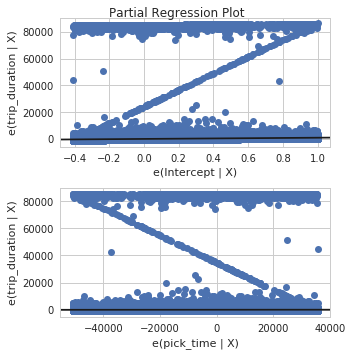

In [247]:
fig = plt.figure(figsize=(5, 5))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.show()

In [252]:
model =  sm.OLS.from_formula("trip_duration ~ np.log(pick_time+1)", data=taxi)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     69.64
Date:                Sat, 10 Mar 2018   Prob (F-statistic):           7.12e-17
Time:                        20:19:15   Log-Likelihood:            -1.3829e+07
No. Observations:             1458640   AIC:                         2.766e+07
Df Residuals:                 1458638   BIC:                         2.766e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               701.2844     30.255     23.179      0.000     641.985     760.584
np.log(pick_time + 1)    23.7147      2.842      8.345      0.000      18.145      29.284
==============================================================================
Omnibus:                  3501924.187   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      27198326235.915
Skew:                          25.271   Prob(JB):                         0.00
Kurtosis:                     670.052   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

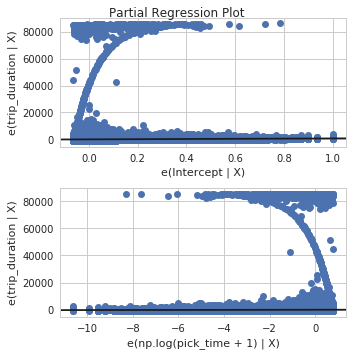

In [253]:
fig = plt.figure(figsize=(5, 5))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.show()

In [256]:
model =  sm.OLS.from_formula("trip_duration ~ abs(np.sin(pick_time))", data=taxi)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.350
Date:                Sat, 10 Mar 2018   Prob (F-statistic):              0.245
Time:                        20:22:10   Log-Likelihood:            -1.3829e+07
No. Observations:             1458640   AIC:                         2.766e+07
Df Residuals:                 1458638   BIC:                         2.766e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                946.5133      6.027    157.051      0.000     934.701     958.326
abs(np.sin(pick_time))     9.9041      8.525      1.162      0.245      -6.805      26.614
==============================================================================
Omnibus:                  3501782.943   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      27191131784.488
Skew:                          25.269   Prob(JB):                         0.00
Kurtosis:                     669.963   Cond. No.                         4.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

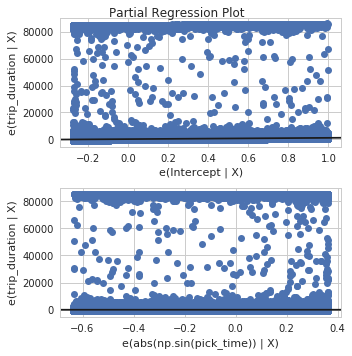

In [257]:
fig = plt.figure(figsize=(5, 5))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.show()

In [244]:
model =  sm.OLS.from_formula("trip_duration ~ abs(np.log(np.sin(pick_time)+1))", data=taxi)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2341
Date:                Sat, 10 Mar 2018   Prob (F-statistic):              0.628
Time:                        20:13:57   Log-Likelihood:            -1.3829e+07
No. Observations:             1458640   AIC:                         2.766e+07
Df Residuals:                 1458638   BIC:                         2.766e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            951.8652      3.279    290.316      0.000     945.439     958.291
abs(np.log(np.sin(pick_time) + 1))     0.8145      1.683      0.484      0.628      -2.485       4.114
==============================================================================
Omnibus:                  3501785.175   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      27191254678.224
Skew:                          25.269   Prob(JB):                         0.00
Kurtosis:                     669.965   Cond. No.                         2.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

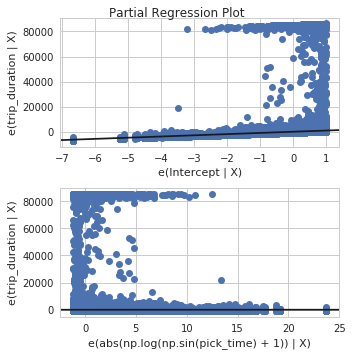

In [245]:
fig = plt.figure(figsize=(5, 5))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.show()

In [248]:
model =  sm.OLS.from_formula("np.log(trip_duration) ~ abs(np.log(np.sin(pick_time)+1))", data=taxi)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(trip_duration)   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.000
Method:                    Least Squares   F-statistic:                    0.4793
Date:                   Sat, 10 Mar 2018   Prob (F-statistic):              0.489
Time:                           20:16:42   Log-Likelihood:            -1.7433e+06
No. Observations:                1458640   AIC:                         3.487e+06
Df Residuals:                    1458638   BIC:                         3.487e+06
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              6.4648      0.001   7821.255      0.000       6.463       6.466
abs(np.log(np.sin(pick_time) + 1))    -0.0003      0.000     -0.692      0.489      -0.001       0.001
==============================================================================
Omnibus:                   164473.498   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1074280.470
Skew:                          -0.344   Prob(JB):                         0.00
Kurtosis:                       7.148   Cond. No.                         2.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

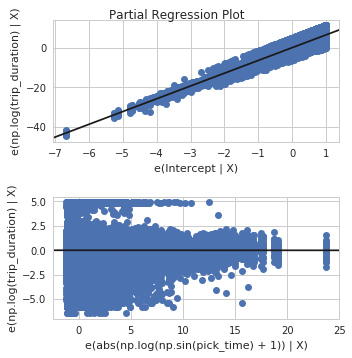

In [249]:
fig = plt.figure(figsize=(5, 5))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.show()

## 0.395 / 2.54
- np.log(trip_duration) ~ I(np.log(weekday//dist+1)

In [224]:
model =  sm.OLS.from_formula("np.log(trip_duration) ~ np.log(weekday//dist+1)", data=taxi)
result = model.fit()
# result = model.fit_regularized(alpha=0.0001, L1_wt=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(trip_duration)   R-squared:                       0.395
Model:                               OLS   Adj. R-squared:                  0.395
Method:                    Least Squares   F-statistic:                 9.503e+05
Date:                   Sat, 10 Mar 2018   Prob (F-statistic):               0.00
Time:                           17:40:18   Log-Likelihood:            -1.3493e+06
No. Observations:                1452743   AIC:                         2.699e+06
Df Residuals:                    1452741   BIC:                         2.699e+06
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       6.9919      0.001   9469.418      0.000       6.990       6.993
np.log(weekday // dist + 1)    -0.6210      0.001   -974.858      0.000      -0.622      -0.620
==============================================================================
Omnibus:                   273520.242   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3101619.966
Skew:                           0.577   Prob(JB):                         0.00
Kurtosis:                      10.065   Cond. No.                         2.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

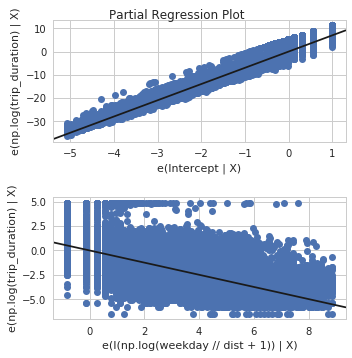

In [182]:
fig = plt.figure(figsize=(5, 5))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.show()

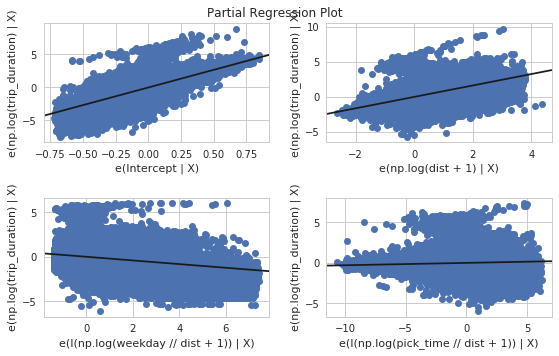

In [197]:
fig = plt.figure(figsize=(8, 5))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.tight_layout()
plt.show()

## R- 0.561 / cond.no. 1
np.log(trip_duration) ~ scale(np.log(dist+1))

In [229]:
model =  sm.OLS.from_formula("np.log(trip_duration) ~ scale(np.log(dist+1))", data=taxi)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(trip_duration)   R-squared:                       0.561
Model:                               OLS   Adj. R-squared:                  0.561
Method:                    Least Squares   F-statistic:                 1.860e+06
Date:                   Sat, 10 Mar 2018   Prob (F-statistic):               0.00
Time:                           17:44:54   Log-Likelihood:            -1.1437e+06
No. Observations:                1458640   AIC:                         2.287e+06
Df Residuals:                    1458638   BIC:                         2.287e+06
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.4645      0.000   1.47e+04      0.000       6.464       6.465
scale(np.log(dist + 1))     0.5986      0.000   1363.918      0.000       0.598       0.599
==============================================================================
Omnibus:                   350667.235   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12841105.389
Skew:                           0.444   Prob(JB):                         0.00
Kurtosis:                      17.508   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

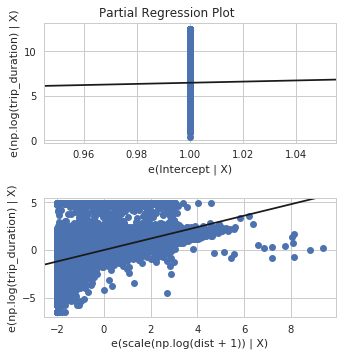

In [230]:
fig = plt.figure(figsize=(5, 5))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.tight_layout()
plt.show()

# d

In [234]:
model =  sm.OLS.from_formula(
    "trip_duration ~ scale(dropoff_latitude*dropoff_longitude)", data=taxi)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2995.
Date:                Sat, 10 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:46:17   Log-Likelihood:            -1.3828e+07
No. Observations:             1458640   AIC:                         2.766e+07
Df Residuals:                 1458638   BIC:                         2.766e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     952.8153      2.623    363.235      0.000     947.674     957.957
scale(dropoff_latitude * dropoff_longitude)   143.5494      2.623     54.724      0.000     138.408     148.691
==============================================================================
Omnibus:                  3506410.197   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      27427265600.084
Skew:                          25.350   Prob(JB):                         0.00
Kurtosis:                     672.857   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

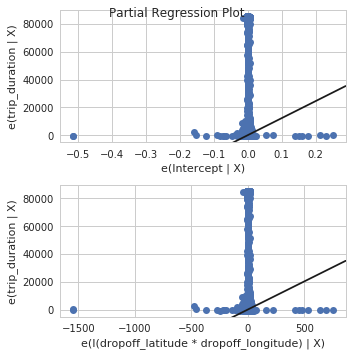

In [219]:
fig = plt.figure(figsize=(5, 5))
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.tight_layout()
plt.show()

# DDDD

In [113]:
test, Dropped = erase_outlier_np(result, test, feature_n+6, category=True, dropped=True)

In [117]:
model =  sm.OLS.from_formula("trip_duration ~ C(weekday)+ {}+0".format(features), data=test) #5번제거
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                 2.744e+05
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:24:19   Log-Likelihood:            -7.6517e+06
No. Observations:             1152796   AIC:                         1.530e+07
Df Residuals:                 1152783   BIC:                         1.530e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
C(weekday)[0.0]     767.5630      0.329   2333.974      0.000     766.918     768.208
C(weekday)[1.0]     774.5883      0.495   1566.062      0.000     773.619     775.558
C(weekday)[2.0]     813.6715      0.483   1683.836      0.000     812.724     814.619
C(weekday)[3.0]     821.8493      0.477   1721.793      0.000     820.914     822.785
C(weekday)[4.0]     827.7400      0.468   1769.025      0.000     826.823     828.657
C(weekday)[5.0]     822.7899      0.458   1797.624      0.000     821.893     823.687
pickup_longitude    -70.7551      0.719    -98.428      0.000     -72.164     -69.346
pickup_latitude      41.2843      0.352    117.437      0.000      40.595      41.973
dropoff_longitude   -75.9253      0.710   -106.925      0.000     -77.317     -74.534
dropoff_latitude    -46.6843      0.340   -137.258      0.000     -47.351     -46.018
dist                735.3706      0.425   1732.021      0.000     734.538     736.203
pick_date             7.4003      0.173     42.813      0.000       7.061       7.739
pick_time            20.1696      0.173    116.674      0.000      19.831      20.508
==============================================================================
Omnibus:                    45516.818   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47402.476
Skew:                           0.470   Prob(JB):                         0.00
Kurtosis:                       2.680   Cond. No.                         5.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""